<a href="https://colab.research.google.com/github/harikan11/Salary-Prediction/blob/main/PredictiveAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from matplotlib.ticker import NullFormatter

import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_df=pd.read_csv('/content/Placement_Data_Full_Class (3).csv')

In [5]:
from google.colab import drive


In [6]:
data_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,14.96,41.76,1024.07,73.17,463.26,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,25.18,62.96,1020.04,59.08,444.37,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,5.11,39.40,1012.16,92.14,488.56,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,20.86,57.32,1010.24,76.64,446.48,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,10.82,37.50,1009.23,96.62,473.90,Placed,425000.0


In [7]:
counts = data_df.nunique()
counts

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
AT                209
V                 172
AP                204
RH                211
PE                211
status              2
salary             45
dtype: int64

In [8]:
data_df.drop_duplicates(inplace=True)

In [9]:
data_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,14.96,41.76,1024.07,73.17,463.26,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,25.18,62.96,1020.04,59.08,444.37,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,5.11,39.40,1012.16,92.14,488.56,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,20.86,57.32,1010.24,76.64,446.48,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,10.82,37.50,1009.23,96.62,473.90,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,6.54,39.33,1011.54,93.69,491.16,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,20.08,62.52,1017.99,75.74,450.98,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,24.67,63.56,1013.75,67.56,446.30,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,27.82,79.74,1008.37,69.46,436.48,Placed,204000.0


In [10]:
data_df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
AT                 0
V                  0
AP                 0
RH                 0
PE                 0
status             0
salary            67
dtype: int64

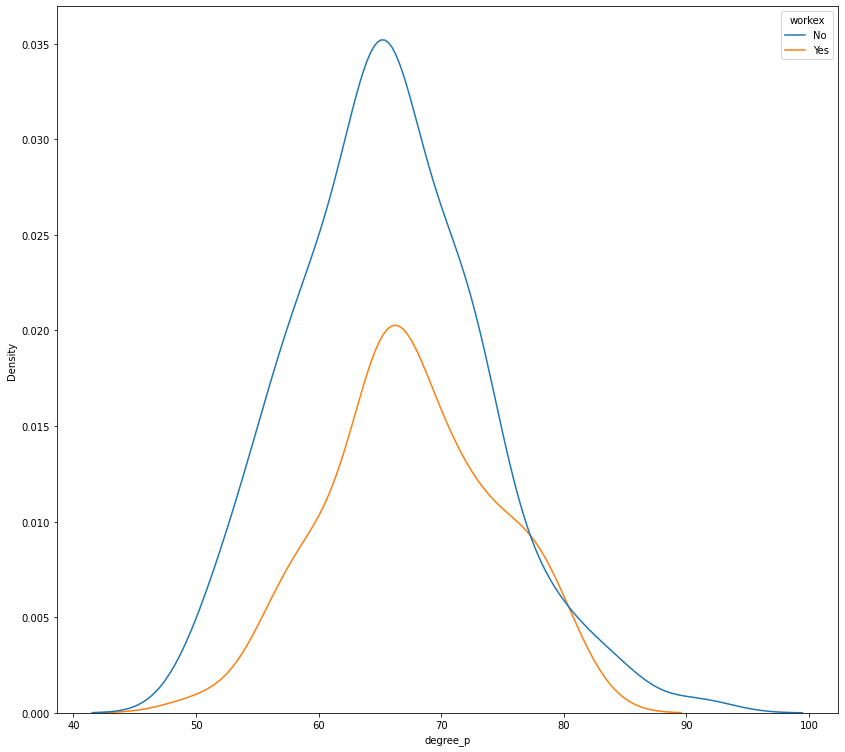

In [11]:
plt.figure(figsize=(14,13))
sns.kdeplot(data = data_df , x = 'degree_p' ,hue='workex')
plt.show()

In [12]:
df_old = data_df[(data_df.degree_p>= 75)&(data_df['hsc_p'] >=80)]
df_old

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,salary
24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,27.36,48.60,1003.18,54.93,436.06,Placed,360000.0
85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,20.45,69.45,1012.53,91.81,441.83,Placed,400000.0
90,91,F,85.00,Others,90.00,Others,Commerce,82.00,Comm&Mgmt,No,92.00,Mkt&Fin,68.03,18.36,51.43,1010.57,90.17,459.80,Placed,300000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,11.49,44.20,1018.79,91.14,475.51,Placed,200000.0
118,119,M,76.00,Central,80.00,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48,23.94,59.39,1014.32,74.55,438.64,Placed,276000.0
162,163,M,74.20,Central,87.60,Others,Commerce,77.25,Comm&Mgmt,Yes,75.20,Mkt&Fin,66.06,23.62,49.21,1014.10,49.54,443.53,Placed,285000.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,13.80,44.21,1022.93,83.37,468.97,Placed,650000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,6.54,39.33,1011.54,93.69,491.16,Placed,400000.0


In [13]:
data_df.replace(' ?' , np.nan ,inplace=True)
data_df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
AT                 0
V                  0
AP                 0
RH                 0
PE                 0
status             0
salary            67
dtype: int64

In [14]:
df_young = data_df[(data_df.degree_p <=80)&(data_df['etest_p'] ==' >10K')]
df_young

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,salary


In [15]:
data_df.drop(data_df.loc[df_young.index].index,axis=0,inplace=True)

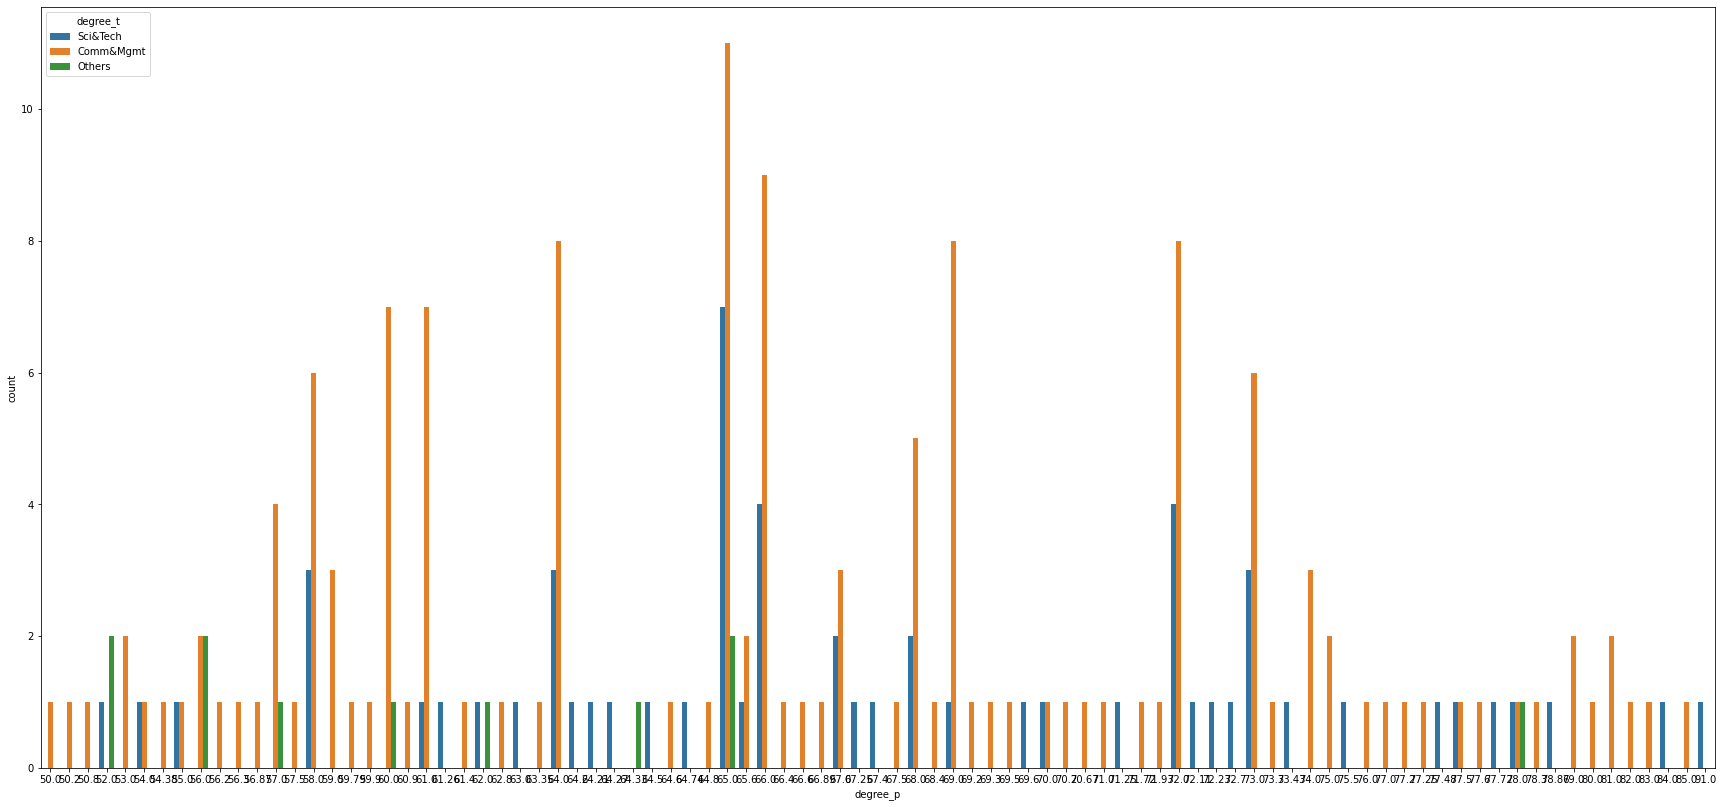

In [16]:
plt.figure(figsize=(30,14))
sns.countplot(data =data_df, x = 'degree_p', hue = 'degree_t')
plt.show()

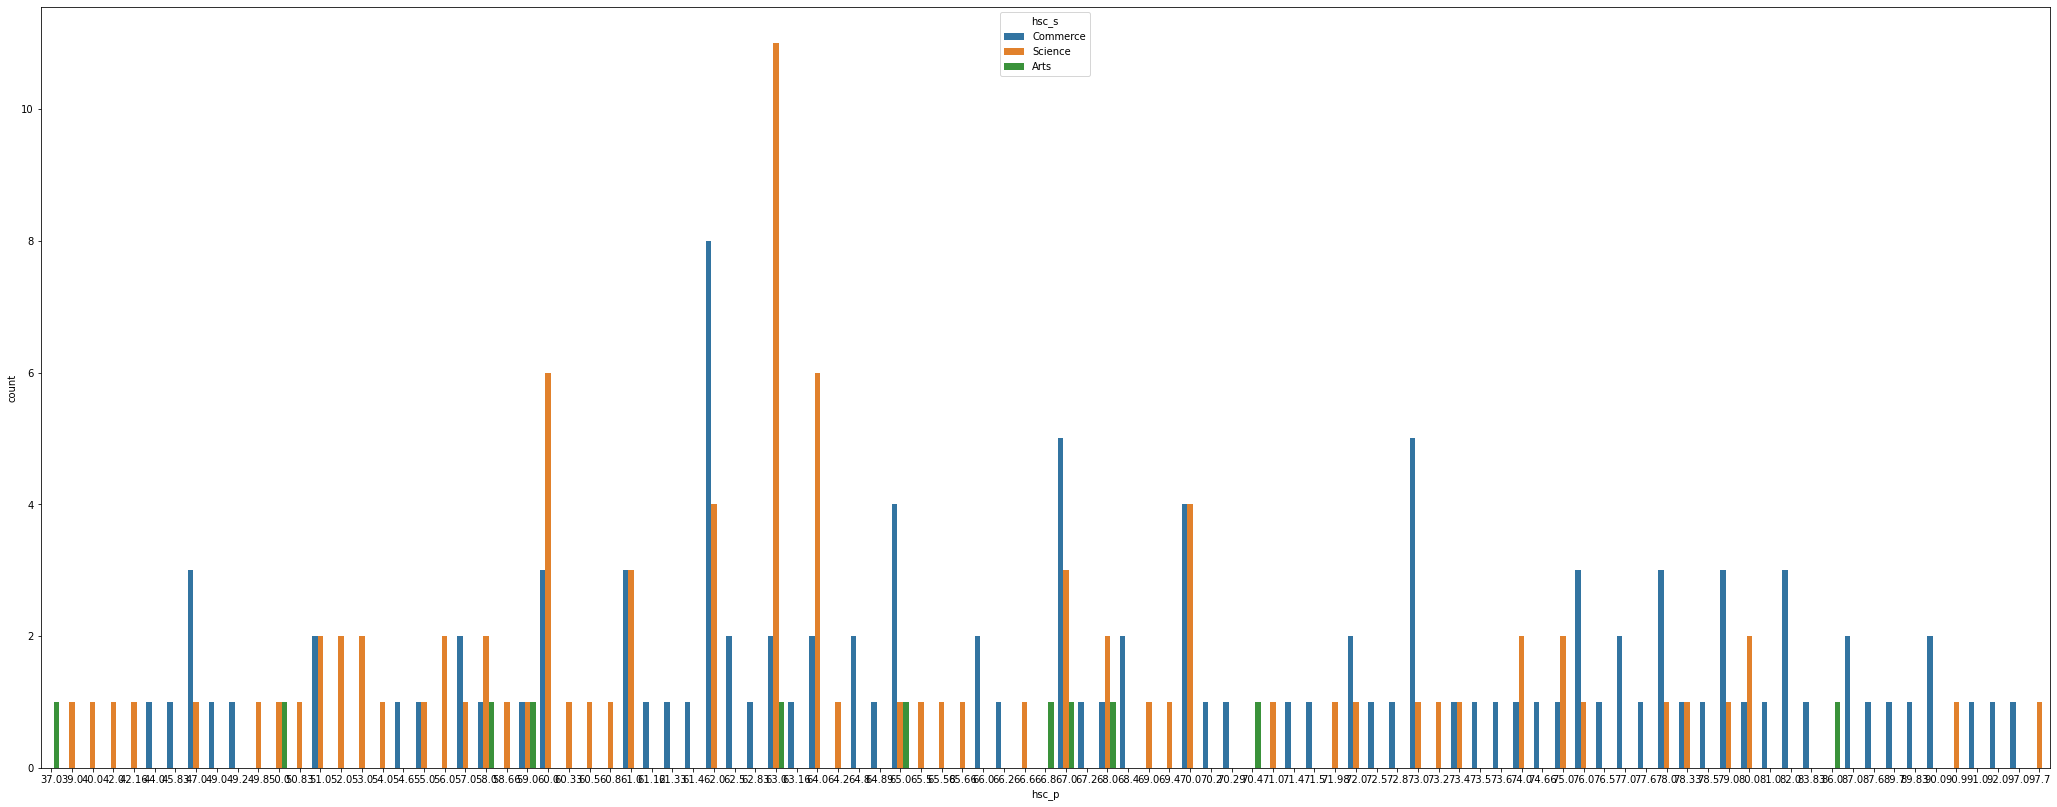

In [17]:
plt.figure(figsize=(36,14))
sns.countplot(data =data_df, x = 'hsc_p', hue = 'hsc_s')
plt.show()

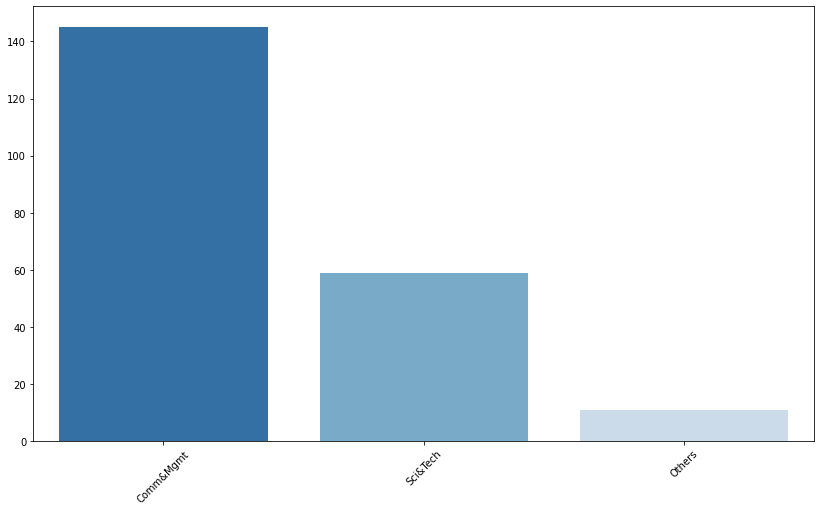

In [18]:
degree_t = data_df['degree_t'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =degree_t.index , y =degree_t.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Employability percentage')

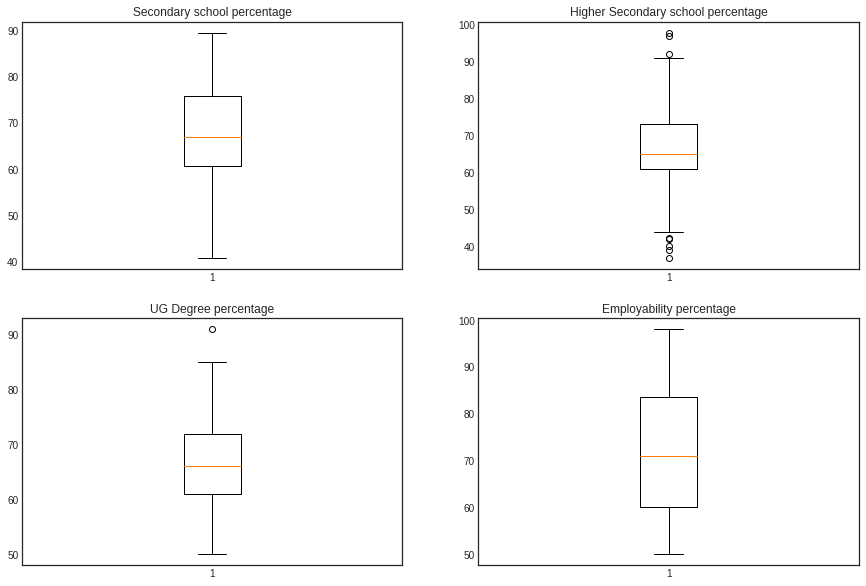

In [19]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(data_df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(data_df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(data_df['etest_p'])
ax.set_title('Employability percentage')

In [20]:
#Very less number of outliers in our features. But we have majority of the outliers in hsc percentage
Q1 = data_df['hsc_p'].quantile(0.25)
Q3 = data_df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1   

filter = (data_df['hsc_p'] >= Q1 - 1.5 * IQR) & (data_df['hsc_p'] <= Q3 + 1.5 *IQR)
data_df_filtered=data_df.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

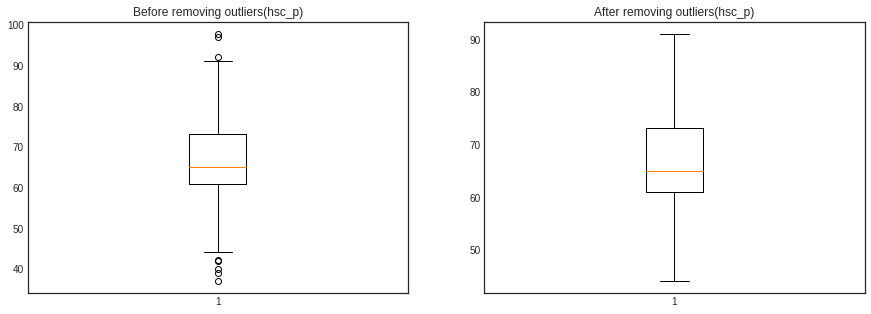

In [21]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(data_df['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(data_df_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

[Text(0, 0, 'Placed'), Text(0, 0, 'Not Placed')]

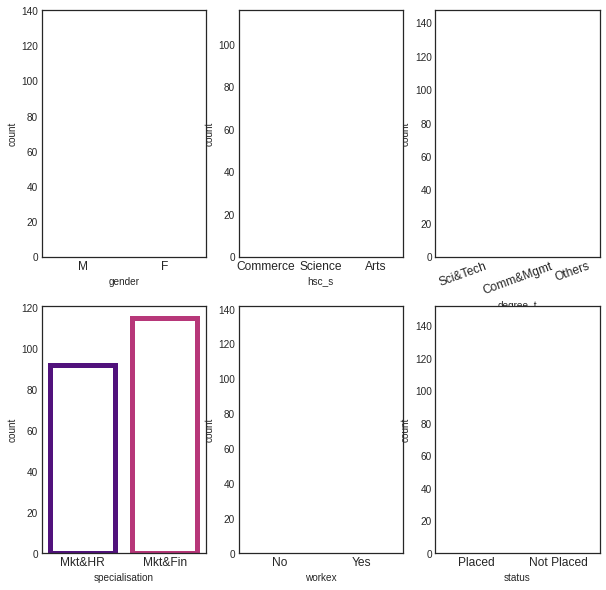

In [22]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=data_df_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

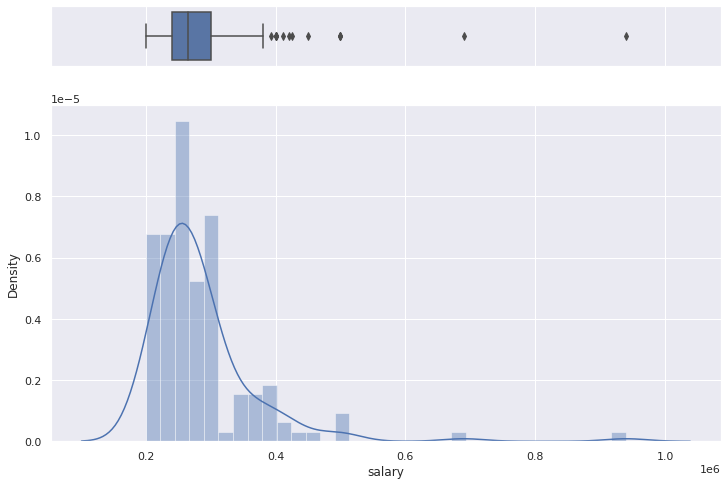

In [23]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

data_df_placed = data_df_filtered[data_df_filtered.salary != 0]
sns.boxplot(data_df_placed["salary"], ax=ax_box)
sns.distplot(data_df_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


#Many candidates who got placed received package between 2L-4L PA
#Only one candidate got around 10L PA
#The average of the salary is a little more than 2LPA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

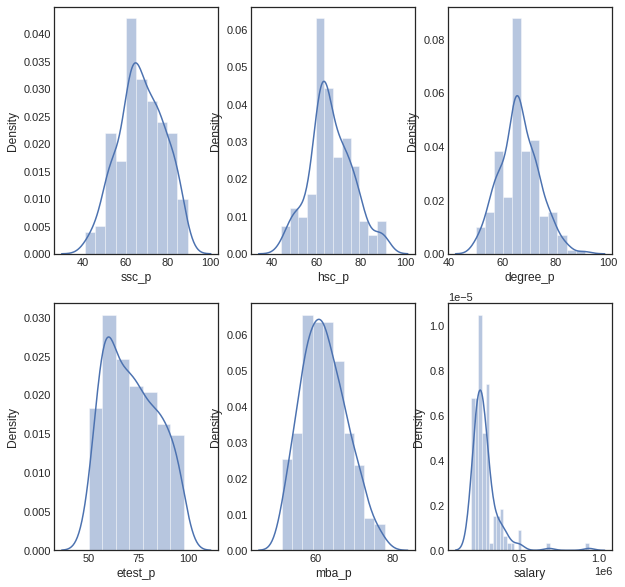

In [ ]:
#Distribution of percentages
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data_df_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data_df_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data_df_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data_df_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data_df_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data_df_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)


#All the distributions follow normal distribution except salary feature
#Most of the candidates educational performances are between 60-80%
#Salary distribution got outliers where few have got salary of 7.5L and 10L PA

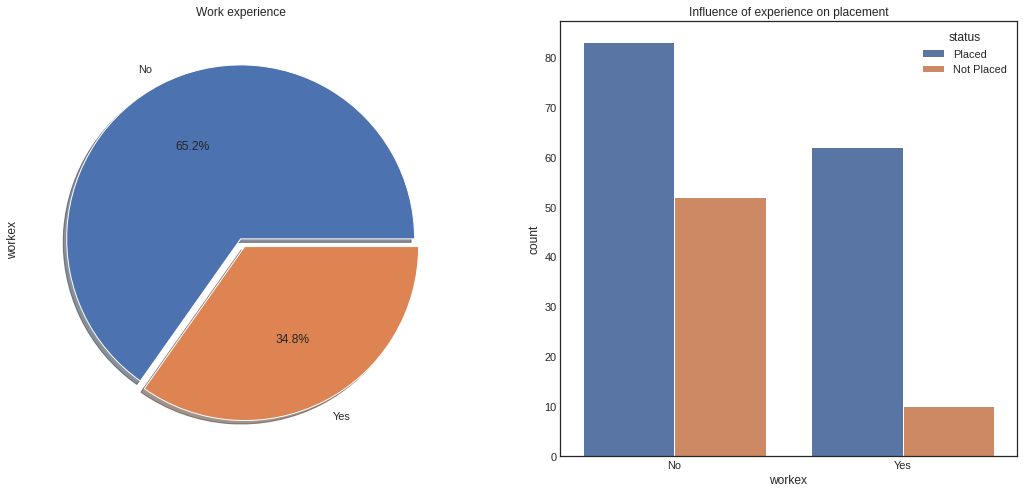

In [24]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data_df_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data_df_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()



#We have nearly 66.2% of candidates who never had any work experience
#Candidates who never had work experience have got hired more than the ones who had experience
#We can conclude that work experience doesn't influence a candidate in the recruitment process

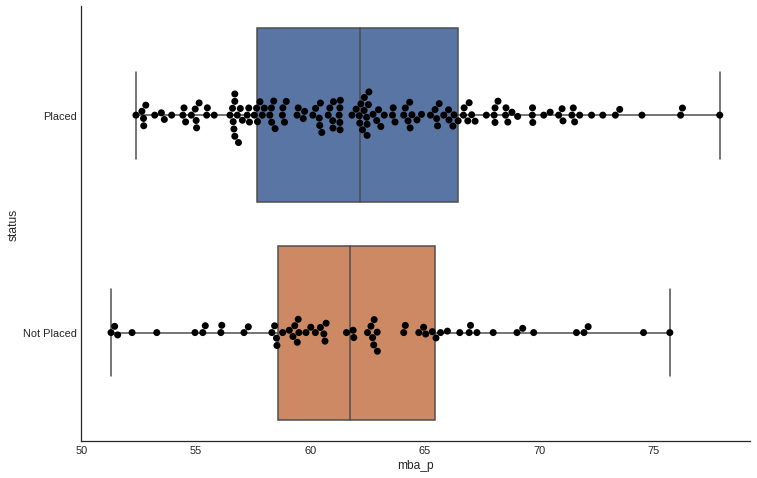

In [25]:
g = sns.boxplot(y = "status",x = 'mba_p',data = data_df_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = data_df_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

#to show the relationship between mba and getting placed

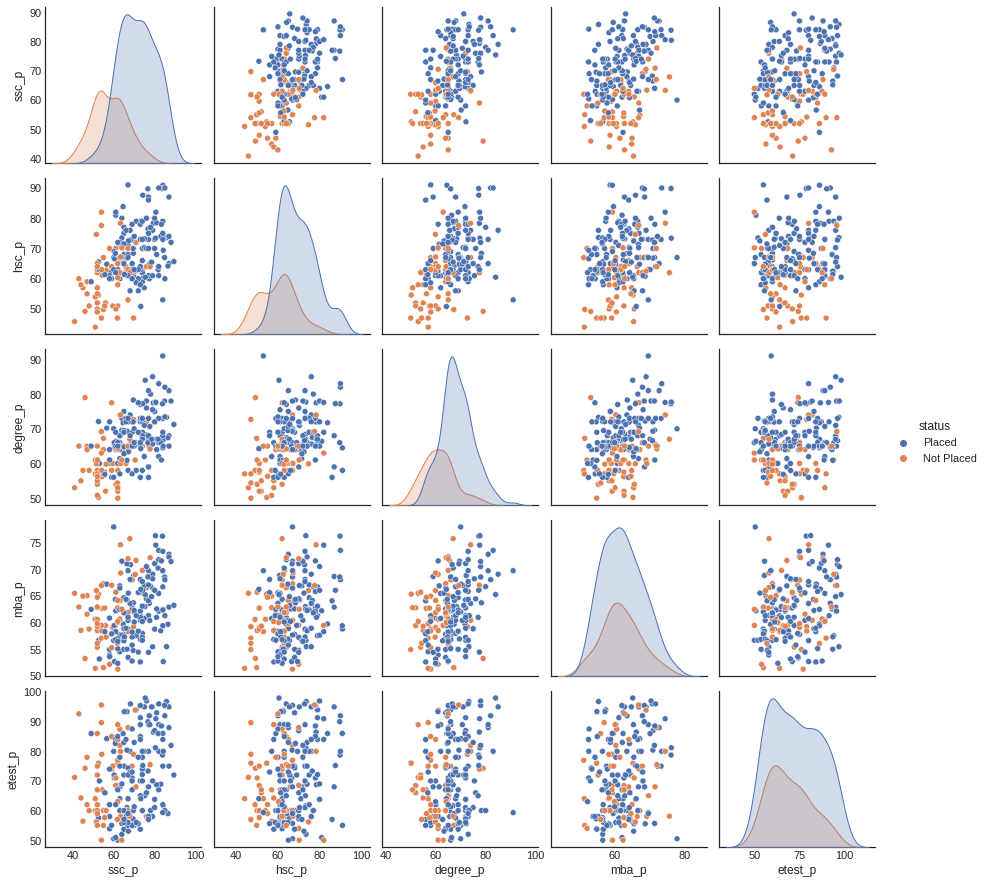

In [26]:
sns.pairplot(data_df_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

#Candidates who has high score in higher secondary and undergrad got placed
#Whomever got high scores in their schools got placed
#Comparing the number of students who got placed candidates who got good mba percentage and employability percentage

In [27]:
#Preprocessing of the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    data_df_filtered[col] = label_encoder.fit_transform(data_df_filtered[col])
data_df_filtered.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,14.96,41.76,1024.07,73.17,463.26,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,25.18,62.96,1020.04,59.08,444.37,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,5.11,39.40,1012.16,92.14,488.56,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,20.86,57.32,1010.24,76.64,446.48,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,10.82,37.50,1009.23,96.62,473.90,1,425000.0


In [28]:
dummy_hsc_s=pd.get_dummies(data_df_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(data_df_filtered['degree_t'], prefix='dummy')
data_df_coded = pd.concat([data_df_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
data_df_coded.drop(['hsc_s','degree_t','salary','gender','ssc_b','hsc_b'],axis=1, inplace=True)
data_df_coded.head()

,sl_no,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,AT,V,AP,RH,PE,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,14.96,41.76,1024.07,73.17,463.26,1,0,1,0,0,0,1
1,2,79.33,78.33,77.48,1,86.5,0,66.28,25.18,62.96,1020.04,59.08,444.37,1,0,0,1,0,0,1
2,3,65.00,68.00,64.00,0,75.0,0,57.80,5.11,39.40,1012.16,92.14,488.56,1,1,0,0,1,0,0
3,4,56.00,52.00,52.00,0,66.0,1,59.43,20.86,57.32,1010.24,76.64,446.48,0,0,0,1,0,0,1
4,5,85.80,73.60,73.30,0,96.8,0,55.50,10.82,37.50,1009.23,96.62,473.90,1,0,1,0,1,0,0


In [29]:
feature_cols=['ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

13

In [30]:
#Assigning the target(y) and predictor variable(X)
X=data_df_coded.drop(['status'],axis=1)
y=data_df_coded.status


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
X = data_df.iloc[:, 0:4].values
y = data_df.iloc[:, 4].values

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
#Choosing a K value

from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [35]:
#Our K value is 6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  8]
 [ 3 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.80      0.92      0.86        36

    accuracy                           0.79        52
   macro avg       0.77      0.71      0.72        52
weighted avg       0.78      0.79      0.78        52



Text(0, 0.5, 'Mean Error')

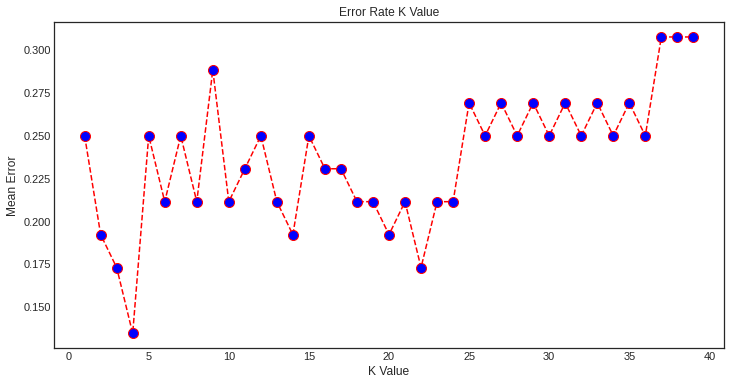

In [36]:
#Finding the best K value
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')